# Mobile price classification
### by Abedi
### run time : 148 s
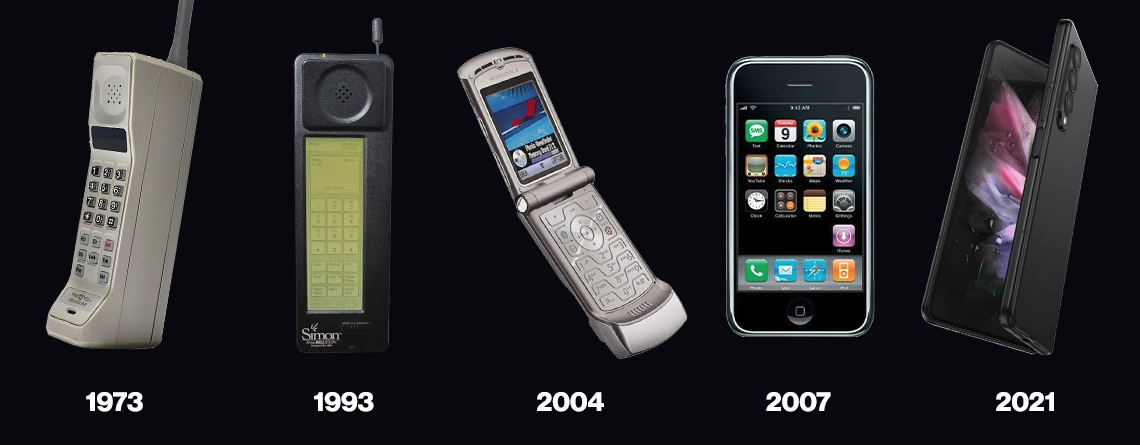

In [165]:
# calculating run time
import datetime
start = timeit.default_timer()

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [167]:
df = pd.read_csv("train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


#### battery_power:Total energy a battery can store in one time measured in mAh
#### blue:Has bluetooth or not
#### clock_speed:speed at which microprocessor executes instructions
#### dual_sim:Has dual_sim supported or not
#### fc:front camera mega pixels
#### four_g:Has 4G or not
#### int_memory:Internal Memory in Gigabytes
#### m_depth:Mobile depth in cm
#### mobile_wt:Weight o mobile phone
#### n_cores:Number o cores of processor
#### pc:Primary camera megapixel
#### px_height:Pixel resolution Height
#### px_width:Pixel resolution width
#### ram:Random access memory n megabytes
#### sc_h:Screen height of mobile in cm
#### sc_w:Screen width of mobile in cm
#### talk_time:longest time that a single battery charge will last when you are
#### three_g:Has 3G or not
#### touch_screen:Has touch screen or not
#### wifi:Has wifi or not

# 
## handling data

In [168]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [169]:
df['m_dep'].unique()

array([0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1. , 0.3, 0.4, 0.2])

In [170]:
df["m_dep"].value_counts()

0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: m_dep, dtype: int64

#### mobile depth can't be less than 0.6 cm ,but most o the numbers are less than 0.6 cm so i drop this column


In [171]:
df.drop("m_dep",axis=1,inplace=True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,10,19,1,1,1,0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   mobile_wt      2000 non-null   int64  
 8   n_cores        2000 non-null   int64  
 9   pc             2000 non-null   int64  
 10  px_height      2000 non-null   int64  
 11  px_width       2000 non-null   int64  
 12  ram            2000 non-null   int64  
 13  sc_h           2000 non-null   int64  
 14  sc_w           2000 non-null   int64  
 15  talk_time      2000 non-null   int64  
 16  three_g        2000 non-null   int64  
 17  touch_screen   2000 non-null   int64  
 18  wifi    

In [173]:
df['px_height'].describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

#### Pixel resolution Height can't be zero

In [174]:
m= df.loc[df['px_height']==0]
m

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,154,8,10,0,994,1958,7,5,7,1,1,0,1


####  I drop this two rows

In [175]:
df.drop(index=[1481,1933], inplace=True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace=True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1994,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1995,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1996,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,10,19,1,1,1,0


In [176]:
#how many negative numbers are there in each column?(because i can't see all columns in describe,I use this way)
df.lt(0).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

####  so there is no negative 
# 

## checking existence of noise
# 

### categorical

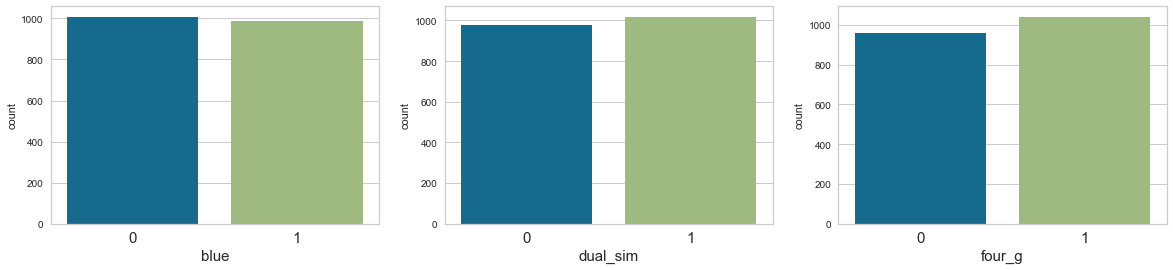

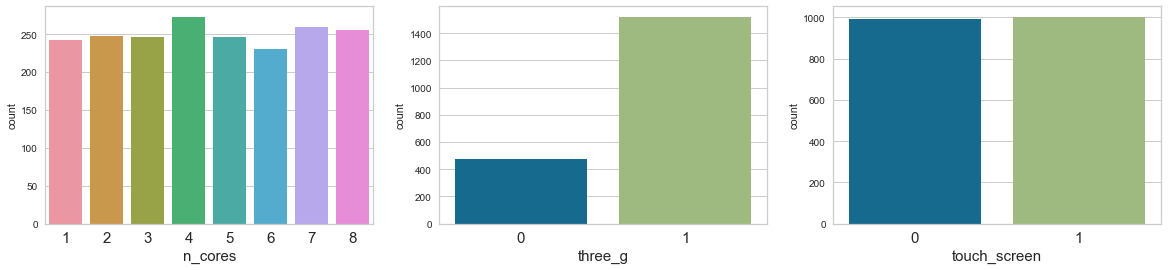

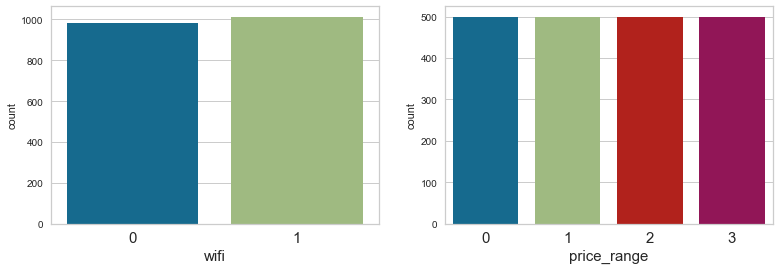

In [177]:
Categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']
i = 0
while i<8:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,3,1)                         #(one row, 3 plots, first one)
    sns.countplot(x = Categorical[i], data=df) # read each one, from Data
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    
    plt.subplot(1,3,2)
    sns.countplot(x = Categorical[i], data=df) # row one , second plot
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    
    if i==8:
        break
    plt.subplot(1,3,3)
    sns.countplot(x = Categorical[i], data=df) # row one , second plot
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    plt.show()

#### there isn't any noise in categorical columns

# 
### Numerical

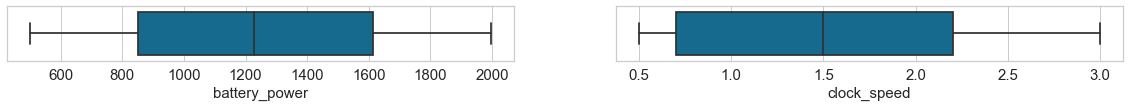

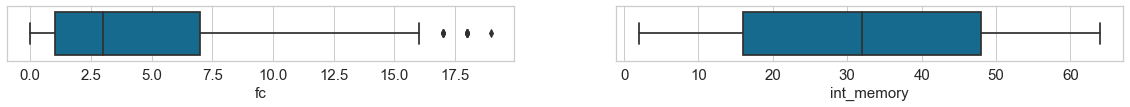

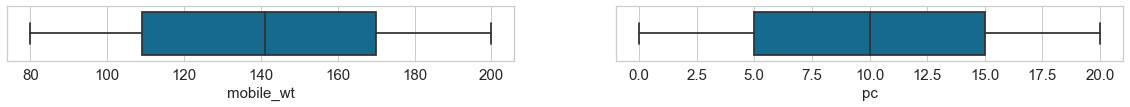

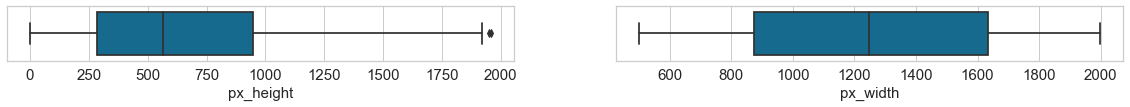

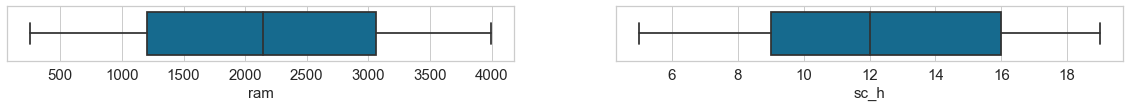

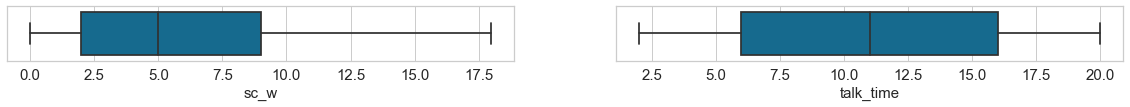

In [178]:
Numerical = ['battery_power','clock_speed','fc','int_memory','mobile_wt','pc','px_height','px_width','ram',
             'sc_h','sc_w','talk_time']
         
i = 0
while i<12:
    fig = plt.figure(figsize = [20,1])
    plt.subplot(1,2,1)   #(one row, two plots, first one)
    sns.boxplot(x = Numerical[i], data=df) # read each one, from Data
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x = Numerical[i], data=df) # row one , second plot
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    plt.show()

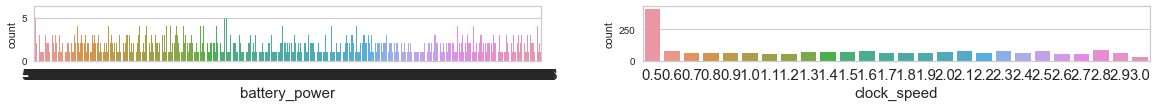

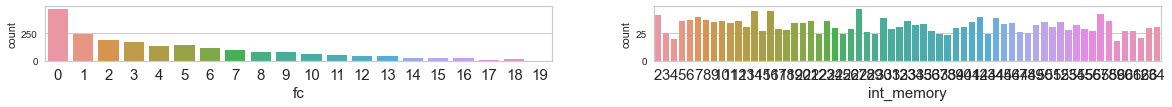

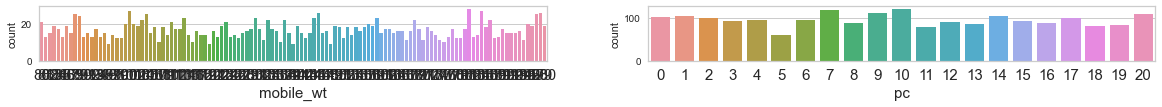

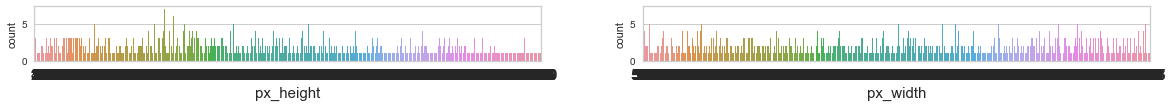

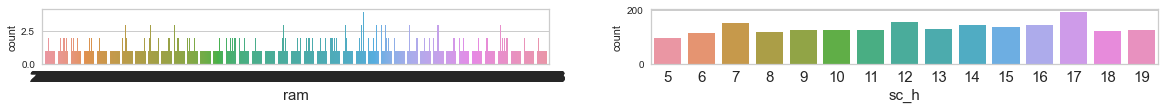

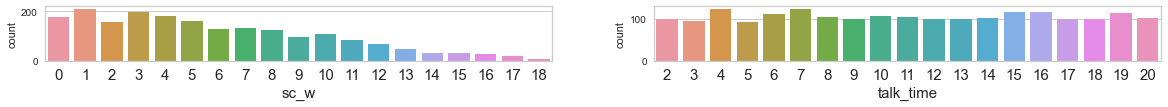

In [179]:
Numerical = ['battery_power','clock_speed','fc','int_memory','mobile_wt','pc','px_height','px_width','ram',
             'sc_h','sc_w','talk_time']
         
i = 0
while i<12:
    fig = plt.figure(figsize = [20,1])
    plt.subplot(1,2,1)   #(one row, two plots, first one)
    sns.countplot(x = Numerical[i], data=df) # read each one, from Data
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x = Numerical[i], data=df) # row one , second plot
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    plt.show()

### sc_w : Screen width of mobile in cm, can't be under 2 , so i eliminate numbers under 2 cm

In [180]:
df = df[df['sc_w']>=2]
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,858,0,2.2,0,1,0,50,84,1,2,528,1416,3978,17,16,3,1,1,0,3
1605,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1606,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1607,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,10,19,1,1,1,0


### 1998-1609 = 389 rows has been droped

## 
### checking ratio between width and height

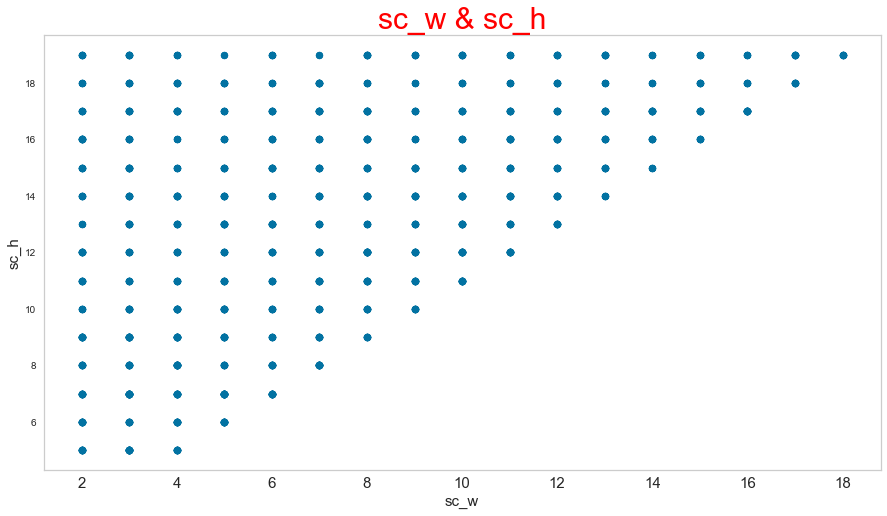

In [181]:
#plot sc_w & sc_h to find noise
plt.figure(figsize=(15,8))
plt.scatter(df['sc_w'],df['sc_h'])
plt.title('sc_w & sc_h',fontsize=30,c='red')
plt.xlabel("sc_w",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("sc_h",fontsize=15)
plt.grid()
plt.show()

### نکات دیگری که میتوان در نظر گرفت، وجود نسبت متناسب بین طول و عرض گوشی است.در نمودار بالا میتوانید به راحتی مشاهده کنید که بیشتر نمونه ها غیر واقعی هستند و نسبت متناسب  ندارند. اگر بخواهم قوانین مستطیل زیبا را اجرا کنم بیشتر از دو سوم دیتا نامتناسب است.اما چون این دیتا برای مقاصد آموزشی تهیه شده است از حذف کردن آنها صرف نظر می کنم

### اگربخواهیم آنها را حذف کنیم ،روش کار برای حذف نسبتهای نامتناسب دین صورت است: ابتدا یک ستون که هر عضو آ ن کسر(عرض/طول) است را می سازیم و به ستونهای دیتا اضافه می کنیم.محدوده ی مناسب این کسر، بین اعداد 2.6 و 1.3 است ، سپس بقیه سطرها را حذف می کنیم. این کار را با دستور زیر می توانیم انجام دهیم

## df['sc_h/sc_w'] = df['sc_h'] / df['sc_w']
## df = df[df['sc_h/sc_w']> = 1.3]
## df = df[df['sc_h/sc_w']<=2.6]
# 
# 

### now , all categorical and numerical points are rational, so there is not any noise
# 

## missing values

In [182]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### so there isn't any missing values
# 

# 
# reproccessing and visualizing data
# 

### price range

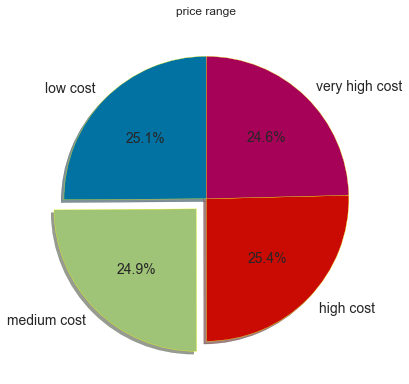

In [183]:
slices = [np.sum((df['price_range']==0).ravel()), np.sum((df['price_range']==1).ravel()),
          np.sum((df['price_range']==2).ravel()), np.sum((df['price_range']==3).ravel())]
labels = ['low cost', 'medium cost','high cost','very high cost']
explode = (0,0.1,0,0)
plt.pie(slices,labels=labels,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'yellow'},textprops={'fontsize': 14})
plt.title('price range')
plt.tight_layout()
plt.show()

#### 4 clsses are balanced
# 

### what percent have bluetooth?

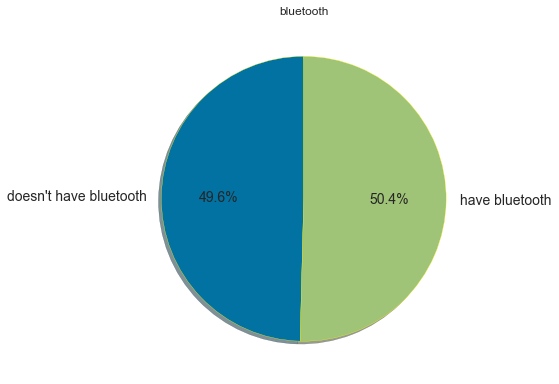

In [184]:
slices = [np.sum((df['blue']==0).ravel()), np.sum((df['blue']==1).ravel())]
labels = ['doesn\'t have bluetooth', 'have bluetooth']

plt.pie(slices,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'yellow'},textprops={'fontsize': 14})
plt.title('bluetooth')
plt.tight_layout()
plt.show()

### what percent does support dual_sim?

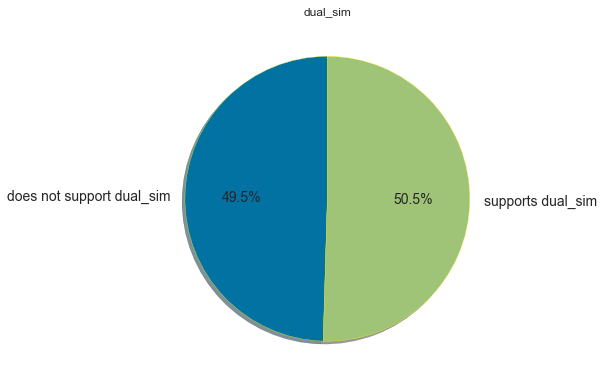

In [185]:
slices = [np.sum((df['dual_sim']==0).ravel()), np.sum((df['dual_sim']==1).ravel())]
labels = ['does not support dual_sim', 'supports dual_sim']

plt.pie(slices,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'yellow'},textprops={'fontsize': 14})
plt.title('dual_sim')
plt.tight_layout()
plt.show()

### In this way ,you can continue and check all categorical columns

# 
### A general Categorical analisys

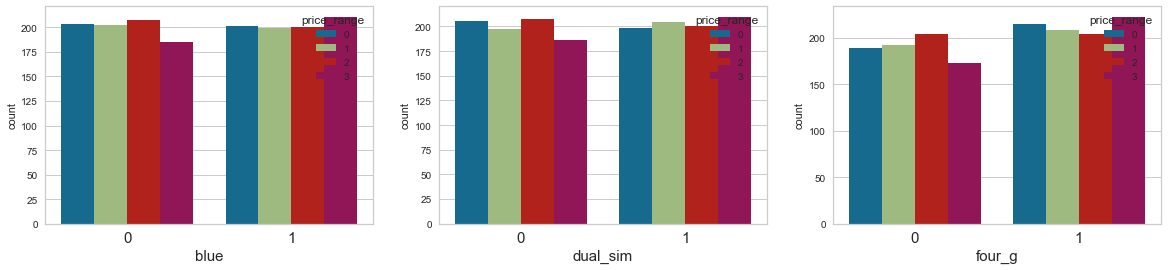

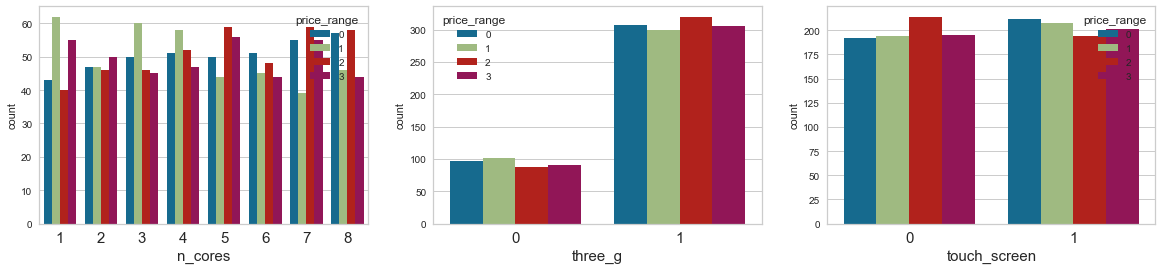

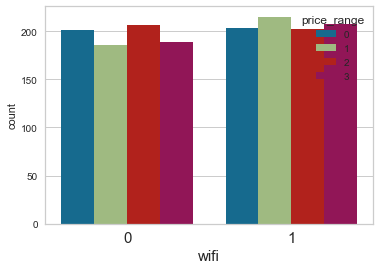

In [186]:
Categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
i = 0
while i<8:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,3,1)                         #(one row, 3 plots, first one)
    sns.countplot(x = Categorical[i],hue ="price_range", data=df) # read each one, from Data
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    if i==7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x = Categorical[i],hue ="price_range", data=df) # row one , second plot
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    
    
    plt.subplot(1,3,3)
    sns.countplot(x = Categorical[i],hue ="price_range", data=df) # row one , second plot
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    plt.show()

## observations:
### mobiles with bluetooth and without bluetooth , are in the same price range.
### mobiles support  dual sim or not , are in the same price range.
### mobiles that have four_g are more expensive than mobiles don't have.
### diffrent cores have the same price range
### mobiles that have three_g are much more expensive than mobiles don't have.
### mobiles that have touch_screen and don't have , are in the same price
### mobiles that have wifi and don't have , are almost in the same price
# 
# 

### Numerical analisys

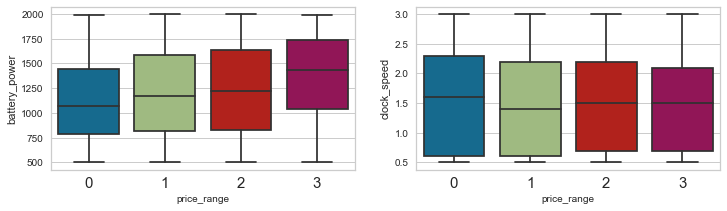

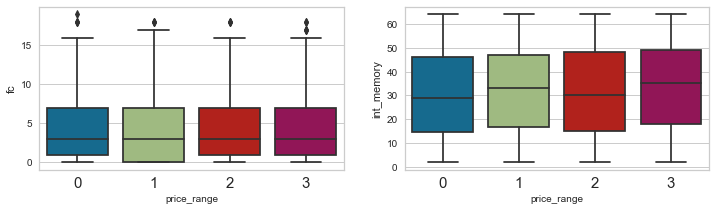

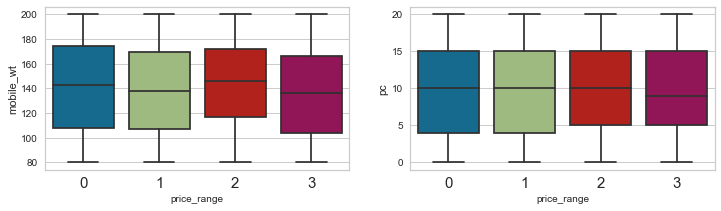

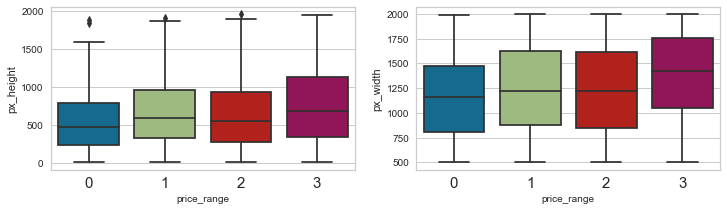

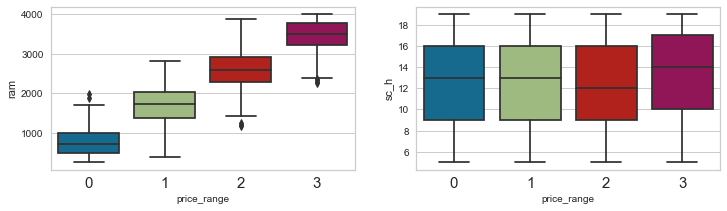

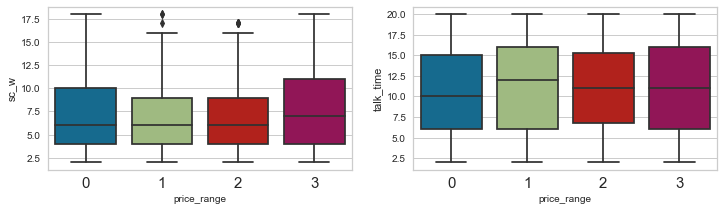

In [187]:
Numerical = ['battery_power','clock_speed','fc','int_memory','mobile_wt','pc','px_height','px_width','ram',
             'sc_h','sc_w','talk_time']
         
i = 0
while i<12:
    fig = plt.figure(figsize = [12,3])
    plt.subplot(1,2,1)   #(one row, two plots, first one)
    sns.boxplot(x = 'price_range',y=Numerical[i], data=df) # read each one, from Data
    plt.xticks(fontsize=15)
    plt.xlabel('price_range',fontsize=10)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x = 'price_range',y=Numerical[i], data=df) # row one , second plot
    plt.xticks(fontsize=15)
    plt.xlabel('price_range',fontsize=10)
    i += 1
    plt.show()

## observations:
### most expensive mobiles have better batteries, but there isn't much diffrence betwwen 1 and 2 price categories.
### least expensive mobiles have lowest clock speed.
### mobiles that don't have front camera have medium price --->(1)
### size of memory is almost the same in all prices
### heviest mobiles have low cost --->(0)
### mobiles in diffrent prices, may have or not have primery camera.
### very high cost mobiles have bigger px_height and px_width.
### by growing the size of ram , price increase alot.
### very high cost mobiles have bigger height and width in cm.
# 
# 

### checking density distribution

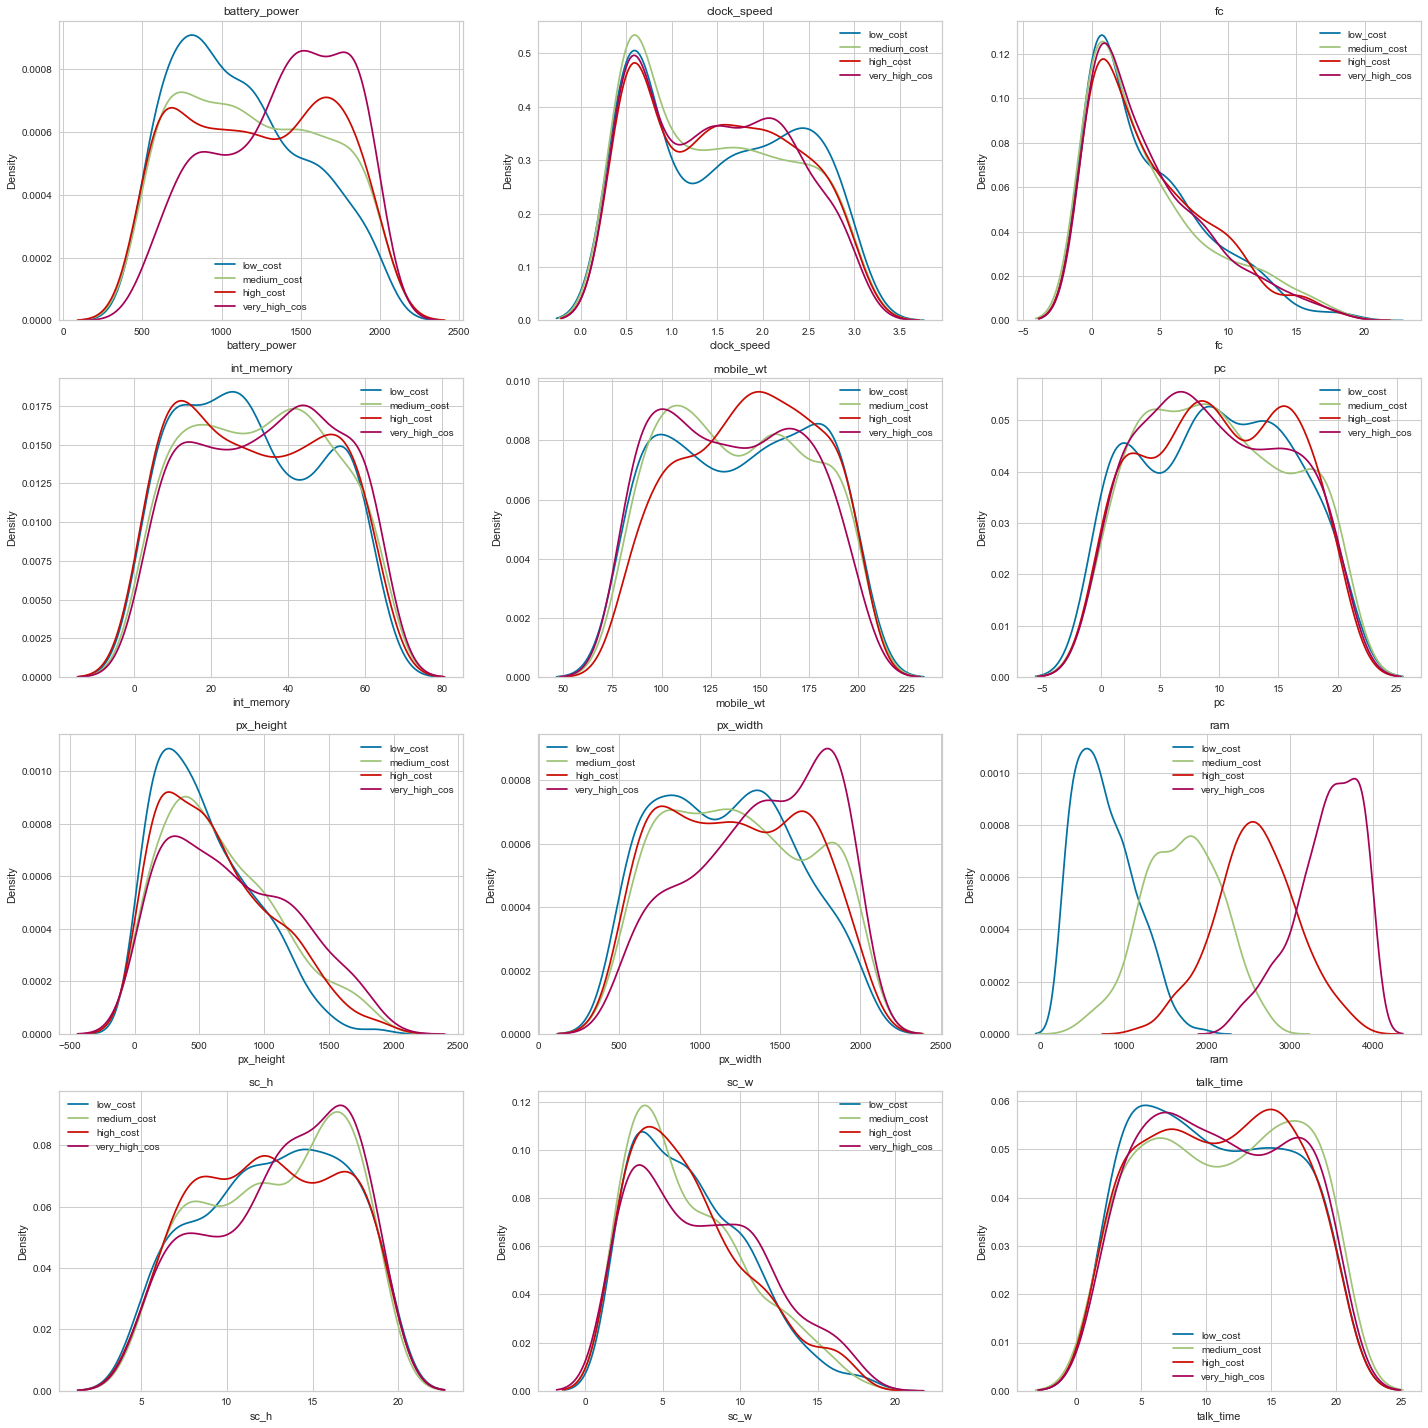

In [188]:
Numerical = ['battery_power','clock_speed','fc','int_memory','mobile_wt','pc','px_height','px_width','ram',
             'sc_h','sc_w','talk_time']
low_cost = df.query("price_range == 0")
medium_cost = df.query("price_range == 1")
high_cost = df.query("price_range == 2")
very_high_cost = df.query("price_range == 3")

plt.figure(figsize = (20,20))
for ax, col in enumerate(Numerical):
    plt.subplot(4,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = low_cost[col], label = "low_cost")
    sns.kdeplot(x = medium_cost[col], label = "medium_cost")
    sns.kdeplot(x = high_cost[col], label = "high_cost")
    sns.kdeplot(x = very_high_cost[col], label = "very_high_cos")
    plt.legend(fontsize =10)
plt.tight_layout()

### observations:
#### most number of low cost mobiles, has battery power 750(mAh). 
#### most number of very high cost mobiles, has battery power 1500-2000(mAh). 
#### most of mobiles in all price range, has 0.5 clock speed.
#### most of mobiles in all price range, has front camera with 2 mega pixel.
#### most number of very high cost mobiles, has 250 pix_height.
####  most number of very high cost mobiles, has 1900 pix_width
####  most of mobiles in all price range, has 4 cm width.
# 


### correlation

Text(0.5, 1.0, 'Correlation')

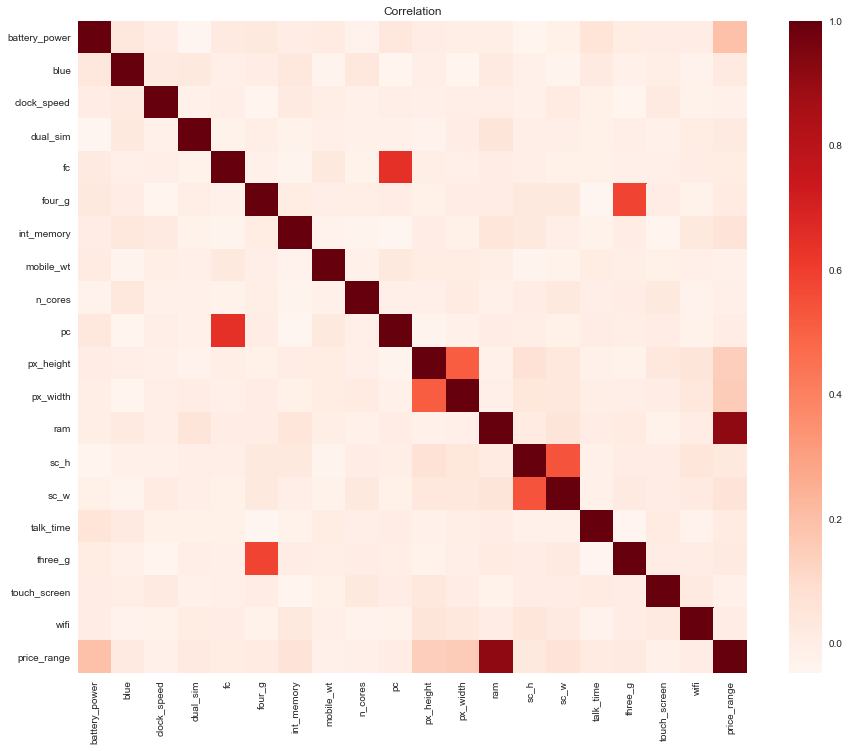

In [189]:
corr = df.corr()
plt.figure(figsize=(15,12))
p=sns.heatmap(corr, cmap='Reds')
p.set_title("Correlation")

### obsrvations:
#### - ram has most affect on  price
#### - 3G and 4G have most correlation
#### - primery camera and front camera have most correlation
#### - pix_width and pix_height have most correlation
#### - sc_w(Screen width of mobile) and sc_h(Screen height of mobile) have most correlation


### sort most correlation by price_range

In [190]:
corr.sort_values(by=['price_range'],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917330
battery_power    0.196288
px_width         0.155291
px_height        0.145118
int_memory       0.058975
sc_w             0.058899
sc_h             0.027184
dual_sim         0.022609
blue             0.022046
three_g          0.019767
talk_time        0.015909
four_g           0.015621
fc               0.012357
pc               0.004713
wifi             0.004313
n_cores         -0.008647
clock_speed     -0.016139
touch_screen    -0.020838
mobile_wt       -0.022835
Name: price_range, dtype: float64

#### analysing most efective feature ----> (ram)

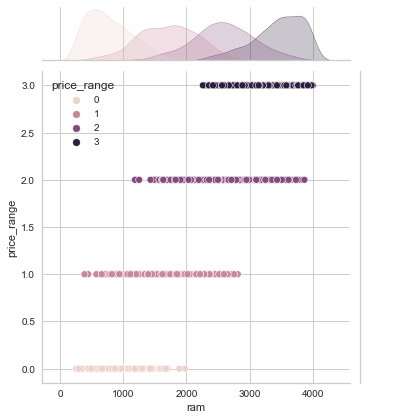

In [191]:
sns.jointplot(x="ram", y="price_range" ,data=df ,hue="price_range" )
plt.grid()

### observations:
#### 250-1000 ram ----> most density for low cost
#### 1000-2000 ram -----> most density for medium cost
#### 2000-3000 ram -----> most density for high cost
#### 3000-4000 ram -----> most density for very high cost
# 

# 
## comparison ram and some of numerical columns 

Text(0.5, 1.0, 'ram & battery_power')

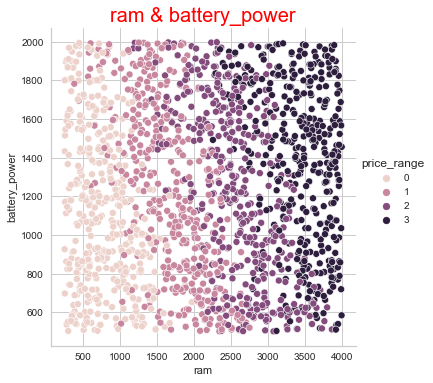

In [192]:
sns.relplot(x='ram' , y='battery_power', hue='price_range',data=df)
plt.title('ram & battery_power',fontsize=20,c='red')

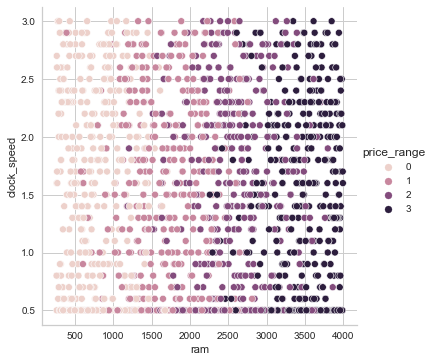

In [193]:
sns.relplot(x='ram' , y='clock_speed',hue='price_range',data=df)

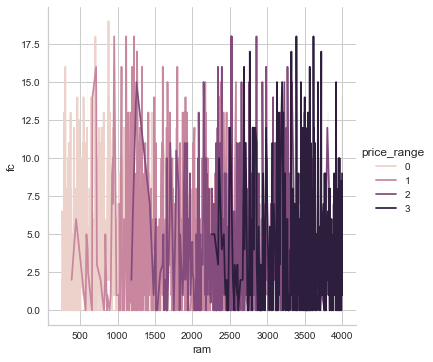

In [194]:
sns.relplot(x='ram' , y='fc', kind='line',hue='price_range',data=df)

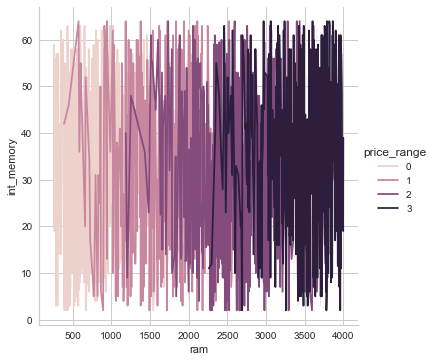

In [195]:
sns.relplot(x='ram' , y='int_memory', kind='line',hue='price_range',data=df)

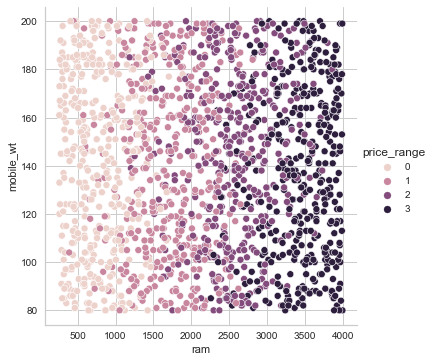

In [196]:
sns.relplot(x='ram' , y='mobile_wt', hue='price_range',data=df)

#### all above, shows the more ram the more price, in numerical columns, other items aren't important
# 

## comparison ram and categorical columns

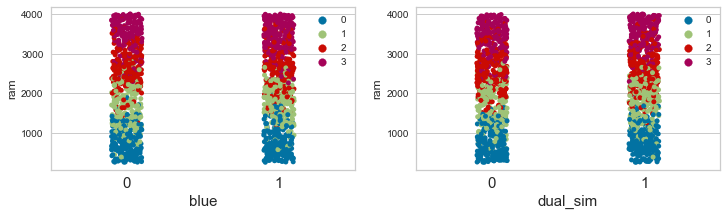

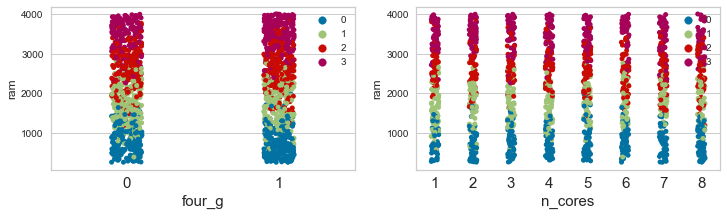

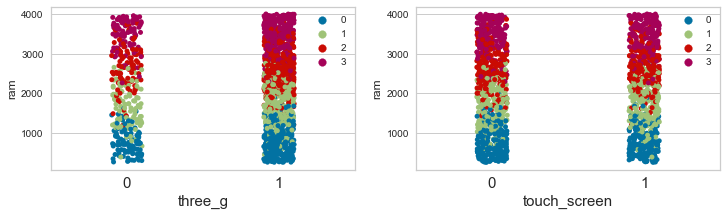

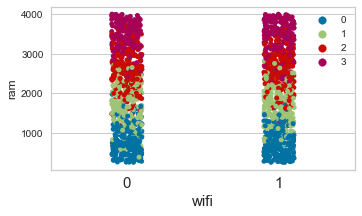

In [197]:
Categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
i = 0
while i<7:
    fig = plt.figure(figsize = [12,3])
    plt.subplot(1,2,1)   #(one row, two plots, first one)
    sns.stripplot(x =df[Categorical[i]].values , y=df.ram.values, hue=df.price_range.values) # read each one, from Data
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    plt.ylabel('ram',fontsize=12)
    plt.grid()
    plt.grid()
    i += 1
    if i==7:
        break
    plt.subplot(1,2,2)
    sns.stripplot(x =df[Categorical[i]].values , y=df.ram.values, hue=df.price_range.values) # row one , second plot
    plt.xticks(fontsize=15)
    plt.xlabel(Categorical[i],fontsize=15)
    plt.ylabel('ram',fontsize=12)
    plt.grid()
    plt.grid()
    i += 1
    plt.show()

### Observations:
#### you can see the more ram the more price, in all categories
# 

# 
## Making model
# 

### making x, y,.... with testsize=0.2 for different algorithms

In [198]:
x = df. drop('price_range', axis =1)
y = df.price_range.values.reshape(-1,1) # Target variable
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 ,random_state = 0)

# 
### Decision Tree

In [199]:
clf = DecisionTreeClassifier()

In [200]:
# using gridsearch to find best parameters for decision tree
max_depth = range(6,21)
criterion = ['entropy', 'gini']
random_state =range(1,8)

parameters = {'max_depth': max_depth , 'criterion':criterion , 'random_state':random_state}
gridsearch = GridSearchCV(estimator = clf,
                         param_grid = parameters,
                         scoring = 'accuracy',
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)
gridsearch.fit(x_train,y_train)
print('best score or decision tree:',gridsearch.best_score_)
print('best parameters:',gridsearch.best_params_)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
best score or decision tree: 0.850858142551202
best parameters: {'criterion': 'entropy', 'max_depth': 8, 'random_state': 7}


In [201]:
clf = DecisionTreeClassifier(max_depth=8,criterion="entropy",random_state =7)#criterion="entropy" --->Accuracy: 0.7705627705627706
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('f1 score for each class is:', metrics.f1_score(y_test, y_pred,average=None))
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))


Accuracy: 0.8509316770186336
f1 score for each class is: [0.93413174 0.8        0.78106509 0.88607595]
f1 score is: 0.8503181936628579


In [202]:
print('classification_report:\n\n',classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.94      0.93      0.93        84
           1       0.74      0.87      0.80        69
           2       0.82      0.74      0.78        89
           3       0.90      0.88      0.89        80

    accuracy                           0.85       322
   macro avg       0.85      0.85      0.85       322
weighted avg       0.85      0.85      0.85       322



In [203]:
confusion_matrix(y_test, y_pred)

array([[78,  6,  0,  0],
       [ 5, 60,  4,  0],
       [ 0, 15, 66,  8],
       [ 0,  0, 10, 70]], dtype=int64)

# 
### Random Forest

In [204]:
Rf = RandomForestClassifier(n_estimators =170 , max_depth = 20,criterion = 'gini',random_state =5)
Rf = Rf.fit(x_train,y_train)
y_pred = Rf.predict(x_test)
print("Accuracy :" , metrics.accuracy_score(y_pred,y_test))
print('f1 score for each class is:', metrics.f1_score(y_test, y_pred,average=None))
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

Accuracy : 0.8975155279503105
f1 score for each class is: [0.94047619 0.83098592 0.86857143 0.94339623]
f1 score is: 0.8958574402389179


In [205]:
print('classification_report:\n\n',classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.94      0.94      0.94        84
           1       0.81      0.86      0.83        69
           2       0.88      0.85      0.87        89
           3       0.95      0.94      0.94        80

    accuracy                           0.90       322
   macro avg       0.90      0.90      0.90       322
weighted avg       0.90      0.90      0.90       322



In [206]:
confusion_matrix(y_test, y_pred)

array([[79,  5,  0,  0],
       [ 5, 59,  5,  0],
       [ 0,  9, 76,  4],
       [ 0,  0,  5, 75]], dtype=int64)

# 
### SVM

In [207]:
svm = SVC(random_state =1)
svm = svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy :" , metrics.accuracy_score(y_pred,y_test))
print('f1 score for each class is:', metrics.f1_score(y_test, y_pred,average=None))
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

Accuracy : 0.9596273291925466
f1 score for each class is: [0.97005988 0.93055556 0.95454545 0.98089172]
f1 score is: 0.9590131525214386


####  using GridSearch for svm's hyper parameters:
#### C = [0.1 , 0.25 , 0.5 , 0.75 , 1.0 , 1.5 , 2 , 2.5]
#### kernel = ['linear', 'rbf']
#### gamma =['auto','scale',1.0,0.01,0.001,0.0001]
#### decision_function_shape = ['ovo', 'ovr']
##### Fitting 5 folds for each of 192 candidates, totalling 960 fits
##### best score: 0.968150695261364
##### best parameters: {'C': 0.75, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}

#### Now i build the model with best parameters, i have found with gridsearch method

In [208]:
svm = SVC(C=0.75 , decision_function_shape = 'ovo' ,gamma = 'auto' ,kernel= 'linear',random_state = 2)
svm = svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy :" , metrics.accuracy_score(y_pred,y_test))
print('f1 score for each class is:', metrics.f1_score(y_test, y_pred,average=None))
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))

Accuracy : 0.968944099378882
f1 score for each class is: [0.98795181 0.96503497 0.95505618 0.96815287]
f1 score is: 0.9690489545702998


In [209]:
confusion_matrix(y_test, y_pred)

array([[82,  2,  0,  0],
       [ 0, 69,  0,  0],
       [ 0,  3, 85,  1],
       [ 0,  0,  4, 76]], dtype=int64)

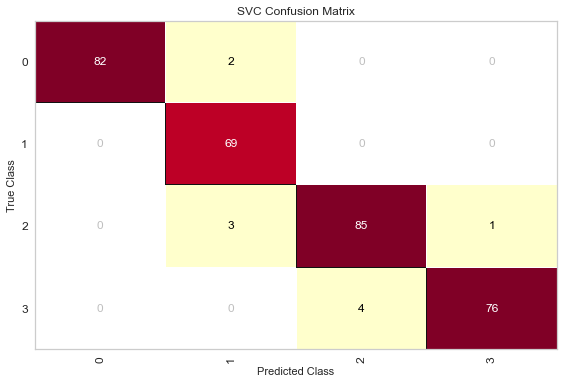

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [210]:
#conusion matrix
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm , classes=[0,1,2,3])
cm.fit(x_train,y_train)
cm.score(x_test, y_test)
cm.poof()

# 
## SO SVM IS THE BEST MODEL WITH ACCURACY=0.968944099378882

# 
### prediction part

In [211]:
df_test = pd.read_csv('test.csv')
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [212]:
df_test.drop(['id','m_dep'], axis =1 , inplace=True)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,11,6,0,1,0


In [213]:
df_test.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [214]:
#deleting noise like train data
df_test = df_test[df_test['px_height']>0]
df_test = df_test[df_test['sc_w']>=2]
df_test.reset_index( inplace = True)
df_test.drop('index',axis=1,inplace = True)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,7,2,0,1,0
1,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10,10,0,1,1
2,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,8,7,1,0,1
3,1464,1,2.9,1,5,1,50,198,8,9,569,939,3506,10,7,3,1,1,1
4,1718,0,2.4,0,1,0,47,156,2,3,1283,1374,3873,14,2,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,567,1,2.7,1,14,1,56,165,8,17,555,1290,336,7,6,7,1,1,1
783,936,1,1.4,1,0,0,46,139,2,0,265,886,684,8,5,12,1,1,1
784,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,8,15,1,1,0
785,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,11,6,0,1,0


# 
### prediction with svm that being trained with 80%  of data

In [215]:
prediction_80=svm.predict(df_test)
prediction_80

array([3, 2, 1, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3,
       0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 1, 2, 0, 0, 1, 3, 1, 1, 0, 0, 3, 1,
       3, 1, 3, 3, 1, 2, 1, 2, 1, 2, 2, 3, 0, 0, 1, 0, 3, 3, 0, 3, 0, 3,
       1, 3, 1, 2, 2, 1, 2, 2, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 2, 3, 3, 3,
       2, 3, 0, 0, 3, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 0, 2, 0, 1, 0,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 3, 3, 2, 3, 2,
       3, 2, 1, 1, 0, 1, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 1, 0, 3, 0, 0,
       2, 2, 1, 3, 3, 0, 3, 1, 2, 0, 0, 1, 3, 3, 3, 0, 0, 2, 3, 1, 3, 1,
       3, 1, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 2, 1, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 3, 3, 2, 1, 1, 0, 2, 0, 0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 2,
       2, 1, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 1, 2, 2, 2, 1, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 1, 2, 3, 0, 1, 0, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 2, 1, 2, 3,

# 
### prediction with svm that being trained with 100% of data

In [216]:
# making price range column for test data and add to it , then append to train data
from numpy.random import randint
y_rand = randint(0,4,787)
df_test['price_range'] = y_rand
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,7,2,0,1,0,1
1,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10,10,0,1,1,3
2,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,8,7,1,0,1,1
3,1464,1,2.9,1,5,1,50,198,8,9,569,939,3506,10,7,3,1,1,1,3
4,1718,0,2.4,0,1,0,47,156,2,3,1283,1374,3873,14,2,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,567,1,2.7,1,14,1,56,165,8,17,555,1290,336,7,6,7,1,1,1,2
783,936,1,1.4,1,0,0,46,139,2,0,265,886,684,8,5,12,1,1,1,1
784,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,8,15,1,1,0,0
785,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,11,6,0,1,0,1


In [217]:
df_final = df.append(df_test)
df_final.reset_index(inplace=True)
df_final

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,782,567,1,2.7,1,14,1,56,165,8,...,555,1290,336,7,6,7,1,1,1,2
2392,783,936,1,1.4,1,0,0,46,139,2,...,265,886,684,8,5,12,1,1,1,1
2393,784,1700,1,1.9,0,0,1,54,170,7,...,644,913,2121,14,8,15,1,1,0,0
2394,785,1533,1,0.5,1,0,0,50,171,2,...,38,832,2509,15,11,6,0,1,0,1


In [218]:
x_new_train = df_final.drop(['price_range'],axis=1)[0:1609]
y_new_train = df_final[['price_range']][0:1609]
x_predict = df_final.drop(['price_range'],axis=1)[1609:]
svm.fit(x_new_train,y_new_train)
prediction_100 = svm.predict(x_predict)
prediction_100

array([3, 2, 1, 3, 3, 1, 3, 3, 3, 0, 2, 0, 2, 1, 3, 3, 1, 3, 0, 2, 0, 3,
       0, 2, 0, 3, 0, 0, 1, 3, 1, 1, 1, 2, 0, 0, 1, 3, 1, 1, 0, 0, 3, 1,
       3, 1, 3, 3, 1, 2, 1, 2, 1, 2, 2, 3, 0, 0, 1, 0, 3, 3, 0, 3, 0, 3,
       1, 3, 1, 2, 2, 1, 2, 2, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 2, 3, 3, 3,
       2, 3, 0, 0, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 0, 2, 0, 1, 0,
       0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 2, 3, 3, 1, 2, 2,
       3, 2, 1, 1, 0, 1, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 1, 0, 3, 0, 0,
       2, 2, 1, 3, 3, 0, 3, 1, 2, 0, 0, 1, 3, 3, 3, 0, 0, 2, 3, 1, 3, 1,
       3, 1, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 2, 1, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 3, 3, 2, 1, 1, 0, 2, 0, 0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 2,
       2, 1, 0, 0, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 1, 2, 2, 2, 1, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 1, 2, 3, 0, 1, 0, 3, 1, 2, 3, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 2, 1, 2, 3,

### in this project , prediction with both 80% train and 100% are the same!

# 
#### run time

In [219]:
stop = timeit.default_timer()

In [221]:
print('run time:',stop-start)

run time: 148.79777600000034
